<a href="https://colab.research.google.com/github/GopiMindgloer/Learning-ML/blob/master/Twitter_Sentiment_Analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Twitter Sentiment Analysis

In [0]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
import string
import re

##**Importing data directly from Kaggle**

In [0]:
!pip install -q kaggle

In [0]:
#upload kaggle token 
from google.colab import files
files.upload()

In [0]:
#Checking of the file is uploaded
ls -lha kaggle.json

-rw-r--r-- 1 root root 68 Jan 29 10:51 kaggle.json


In [0]:
#creating a directory to put the json file and give it necessary permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
#downloading the data directly from kaggle
!kaggle competitions download -c twitter-sentiment-analysis2

In [0]:
!unzip train.csv.zip

In [0]:
!jar xvf train.csv.zip

In [0]:
!ls

kaggle.json  sample_data  test.csv.zip	train.csv.zip


**I couldn't unzip the data due to some error in the file. So I will upload directly**

##Importing data directly

In [0]:
from google.colab import files
files.upload()

In [12]:
!ls

 sample_data		        test_tweets_anuFYb8.csv   train_E6oV3lV.csv
'test_tweets_anuFYb8 (1).csv'  'train_E6oV3lV (1).csv'


##**Data Preprocessing :**

###Creating DataFrames

In [0]:
train = pd.read_csv('train_E6oV3lV (1).csv')

In [0]:
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [15]:
dataset = pd.concat([train,test], ignore_index = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 3 columns):
id       49159 non-null int64
label    31962 non-null float64
tweet    49159 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [16]:
dataset.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


###Removing the usernames

In [0]:
#A program to remove the unwanted expressions
def remove_exp(input_text, pattern):
  item = re.findall(pattern, input_text)
  for i in item:
    input_text = re.sub(i,'',input_text)
  return input_text

In [0]:
dataset['Clean Tweet'] = np.vectorize(remove_exp)(dataset['tweet'],'@[\w*]')

In [23]:
dataset.head()

,id,label,tweet,Clean Tweet
0,1,0.0,@user when a father is dysfunctional and is s...,ser when a father is dysfunctional and is so ...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,ser ser thanks for #lyft credit i can't use ca...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


###Removing unwanted punctuations and special characters

In [0]:
dataset['Clean Tweet'] = dataset['Clean Tweet'].str.replace("[^a-zA-Z#]", " ")

In [25]:
dataset.head()

,id,label,tweet,Clean Tweet
0,1,0.0,@user when a father is dysfunctional and is s...,ser when a father is dysfunctional and is so ...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,ser ser thanks for #lyft credit i can t use ca...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


###Removing Unnecessary stopwords

In [0]:
stop = stopwords.words('english')
dataset['Clean Tweet'] = dataset['Clean Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [39]:
dataset.head()

,id,label,tweet,Clean Tweet
0,1,0.0,@user when a father is dysfunctional and is s...,ser father dysfunctional selfish drags kids dy...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,ser ser thanks #lyft credit use cause offer wh...
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love u take u time ur
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


###Tokenizing

In [40]:
tokenized_data = dataset['Clean Tweet'].apply(lambda x: x.split())
tokenized_data.head()

0    [ser, father, dysfunctional, selfish, drags, k...
1    [ser, ser, thanks, #lyft, credit, use, cause, ...
2                                    [bihday, majesty]
3                 [#model, love, u, take, u, time, ur]
4                   [factsguide, society, #motivation]
Name: Clean Tweet, dtype: object

###Stemming

In [54]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_data = tokenized_data.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_data.head()

0    [ser, father, dysfunct, selfish, drag, kid, dy...
1    [ser, ser, thank, #lyft, credit, use, caus, of...
2                                    [bihday, majesti]
3                 [#model, love, u, take, u, time, ur]
4                         [factsguid, societi, #motiv]
Name: Clean Tweet, dtype: object

In [0]:
for i in range(len(tokenized_data)):
    tokenized_data[i] = ' '.join(tokenized_data[i])

dataset['Clean Tweet'] = tokenized_data

In [58]:
dataset.head()

,id,label,tweet,Clean Tweet
0,1,0.0,@user when a father is dysfunctional and is s...,ser father dysfunct selfish drag kid dysfunct ...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,ser ser thank #lyft credit use caus offer whee...
2,3,0.0,bihday your majesty,bihday majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love u take u time ur
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


###Removing shorter words

In [0]:
dataset['Clean Tweet'] = dataset['Clean Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [65]:
dataset.head()

,id,label,tweet,Clean Tweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus offer wheelchair #disa...
2,3,0.0,bihday your majesty,bihday majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


##Visualization

In [0]:
words = ' '.join([text for text in dataset['Clean Tweet']])

###Creating a wordcloud for all words

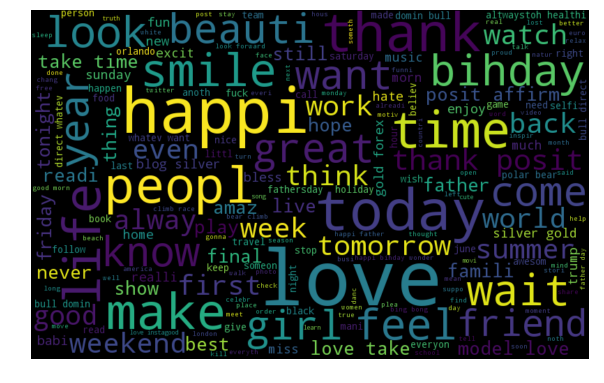

In [69]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800,height = 500,random_state = 21,max_font_size = 110).generate(words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()


###Creating a wordcloud for positive words

In [0]:
positive_words =' '.join([text for text in dataset['Clean Tweet'][dataset['label'] == 0]])

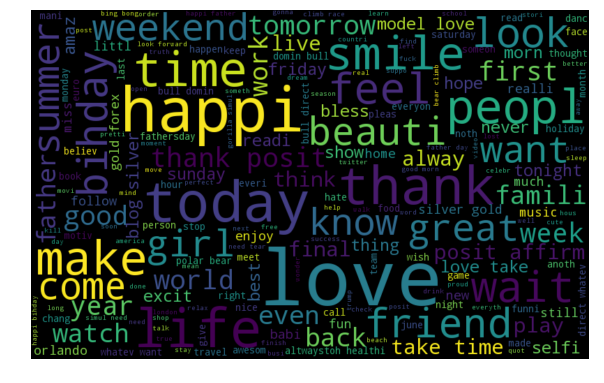

In [71]:
wordcloud = WordCloud(width = 800, height = 500,random_state = 21, max_font_size = 110).generate(positive_words)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

###Creating a wordcloud for negative words

In [0]:
negative_words = ' '.join(text for text in dataset['Clean Tweet'][dataset['label'] == 1])

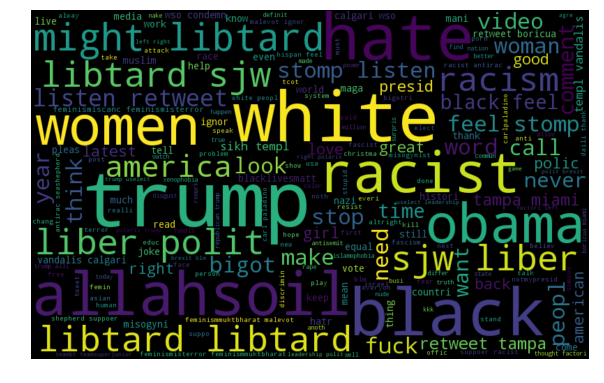

In [73]:
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(negative_words)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

###Analysing the hashtags

In [0]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [0]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(dataset['Clean Tweet'][dataset['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(dataset['Clean Tweet'][dataset['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

####Positive hashtags

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


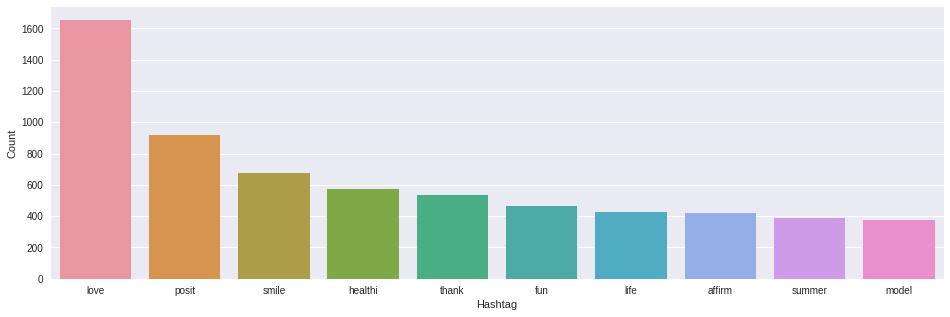

In [75]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

####Negative hashtags

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


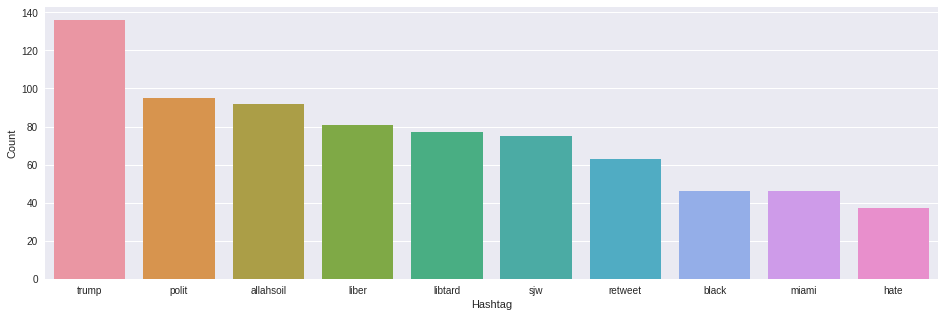

In [86]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

##Feature Extraction

###Bag of words Feature

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(dataset['Clean Tweet'])

###TF-IDF features

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(dataset['Clean Tweet'])

##Model Building

###Using Bag of words Features

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


###Using TF-IDF

In [92]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5354609929078015